In [13]:
import numpy as np
import matplotlib.pyplot as plt
import simulate as sim

In [14]:
#starting with an [r,t,n] 
center_of_mass = np.array([[0,0,0]]).T
orbit_radius = 10

sat1_x0 = np.array([[orbit_radius,0,0]]).T #units u
sat1_nx0 = sat1_x0/np.linalg.norm(sat1_x0)
sat1_v = 3 #u/s
sat1_nv0 = np.array([[0,1,1]]).T/np.linalg.norm(np.array([0,1,1]))

sat2_x0 = np.array([[0,orbit_radius,0]]).T #units u
sat2_nx0 = sat2_x0/np.linalg.norm(sat2_x0)
sat2_v = 3 #u/s
sat2_nv0 = np.array([[1,0,1]]).T/np.linalg.norm(np.array([1,0,1]))

sat3_x0 = np.array([[0,0,orbit_radius]]).T #units u
sat3_nx0 = sat3_x0/np.linalg.norm(sat3_x0)
sat3_v = 3 #u/s
sat3_nv0 = np.array([[1,1,0]]).T/np.linalg.norm(np.array([1,1,0]))



del_t = 0.1 #arbitrary time unit
n_orbits = 0.1
t = np.linspace(0,n_orbits*2*np.pi)
x1 = center_of_mass + orbit_radius * np.sin(t) * sat1_nv0 + orbit_radius * np.cos(t) * sat1_nx0
x2 = center_of_mass + orbit_radius * np.sin(t) * sat2_nv0 + orbit_radius * np.cos(t) * sat2_nx0
x3 = center_of_mass + orbit_radius * np.sin(t) * sat3_nv0 + orbit_radius * np.cos(t) * sat3_nx0



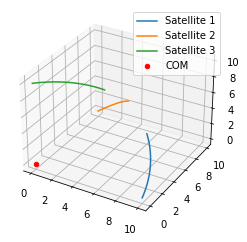

In [15]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(0,0,0,color='r',label="COM")

ax.plot(x1[0,:],x1[1,:],x1[2,:], label='Satellite 1')
ax.plot(x2[0,:],x2[1,:],x2[2,:], label='Satellite 2')
ax.plot(x3[0,:],x3[1,:],x3[2,:], label='Satellite 3')
ax.legend()
#ax.axis("equal")

plt.show()


In [16]:
orbit_radius = 10
sat1_x0 = np.array([[orbit_radius,0,0]]).T #units u
sat1_nv0 = np.array([[0,1,1]]).T/np.linalg.norm(np.array([0,1,1])).T

sat2_x0 = np.array([[0,orbit_radius,0]]).T #units u
sat2_nv0 = np.array([[1,0,1]]).T/np.linalg.norm(np.array([1,0,1])).T

sat3_x0 = np.array([[0,0,orbit_radius]]).T #units u
sat3_nv0 = np.array([[1,1,0]]).T/np.linalg.norm(np.array([1,1,0])).T

# Initialize 3 Observer Satellites
o1 = sim.observer(sat1_x0,sat1_nv0)
o2 = sim.observer(sat2_x0,sat2_nv0)
o3 = sim.observer(sat3_x0,sat3_nv0)

In [17]:
debris_points = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1],[-1,1,1],[-1,1,-1],[-1,-1,1],[-1,-1,-1],[3,0,1],[3,0,-1],[-2,0,-1]]).T
    
    # Initialize the Quaternion for Debris Rotation. 
    # Given any normalized direction vector [nx,ny,nz] and angular rotation [omega], the quaternion is of the 
    # form: [nx*sin(omega/2),ny*sin(omega/2),nz*sin(omega/2),cos(omega/2)]
omega = .04 # rad/s
quat = np.array([0,1*np.sin(omega/2),0,np.cos(omega/2)])

# Initialize the Debris Object
deb = sim.debris(debris_points,quat)
mtest = sim.MeasurementModel(deb,np.array([o1,o2,o3]),n_blind=0)

In [18]:
import EKF_class as EKF
n = 36
mu0 = np.zeros((n))
mu0[:3] = np.array([0.0, 0.0, 0.04])
mu0[3:] = debris_points.flatten()
sigma0 = 100* np.diag(np.ones((n)))

kalman_filter = EKF.KalmanFilter(mu0, sigma0, del_t)

In [19]:
t1 = np.linspace(0,60, int(60/del_t))

P_est_hist = np.zeros((len(t1), n, n))
x_est_hist = np.zeros((len(t1), n))
x_est_hist_min = np.zeros((len(t1), n))
for i in range(len(t1)):
    y = mtest[i].flatten() #replace with measurements
    sat_pos = o1[i].flatten()

    x_est_min, P_est = kalman_filter.predict()
    x_est, P_est = kalman_filter.update(y[:11], x_est_min, P_est, sat_pos)
  
    # Make sure to store the estimated state and covariance for analysis
    P_est_hist[i, :, :] = P_est
    x_est_hist[i, :] = x_est
    x_est_hist_min[i, :] = x_est_min

-0.7683498199278325
dist 9.1104335791443
-0.7683498199278325
dist 9.1104335791443
1.8347785189881796
dist 11.445523142259598
-2.1773242158072694
dist 7.3484692283495345
-0.7683498199278325
dist 9.1104335791443
-0.7683498199278325
dist 9.1104335791443
1.0
dist 11.0
0.19802950859533489
dist 10.099504938362077
-0.7683498199278325
dist 9.1104335791443
1.172170525067662
dist 11.090536506409418
-0.7683498199278325
dist 9.1104335791443
C [[ 0.          0.          0.         -0.98787834  0.10976426  0.10976426
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.98787834 -0.10976426 -0.10976426  0.          0.          0.
   0.          0.   

In [20]:
x_est_hist[0,1]

0.0

## Angular Velocity

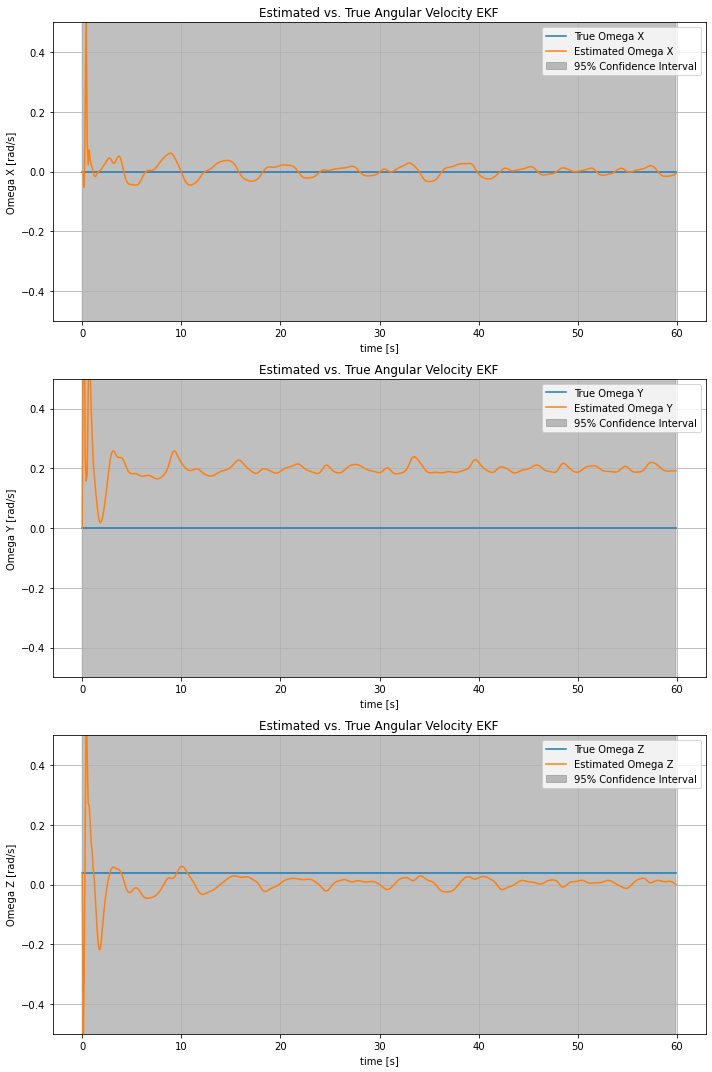

In [21]:
time_step = del_t
time_array = np.arange(0, len(x_est_hist) * time_step, time_step)

std_dev_heading = np.sqrt(P_est_hist[:, 5, 5])
confidence_interval_heading = 1.96 * std_dev_heading #95%

std_dev_x = np.sqrt(P_est_hist[:, 3, 3])
confidence_interval_x = 1.96 * std_dev_x

std_dev_y = np.sqrt(P_est_hist[:, 4, 4])
confidence_interval_y = 1.96 * std_dev_y

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(time_array,  np.zeros(len(time_array)), label="True Omega X")
axs[0].plot(time_array, x_est_hist[:, 0], label="Estimated Omega X")
axs[0].fill_between(time_array, x_est_hist[:, 0] - confidence_interval_x, x_est_hist[:, 0] + confidence_interval_x, color='gray', alpha=0.5, label="95% Confidence Interval")
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('Omega X [rad/s]')
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylim([-0.5, 0.5])
axs[0].set_title('Estimated vs. True Angular Velocity EKF')

# Plot Y Position
axs[1].plot(time_array, np.zeros(len(time_array)), label="True Omega Y")
axs[1].plot(time_array, x_est_hist[:, 1], label="Estimated Omega Y")
axs[1].fill_between(time_array,  x_est_hist[:, 1] - confidence_interval_y, x_est_hist[:, 1] + confidence_interval_y, color='gray', alpha=0.5, label="95% Confidence Interval")
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('Omega Y [rad/s]')
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim([-0.5, 0.5])
axs[1].set_title('Estimated vs. True Angular Velocity EKF')

axs[2].plot(time_array,  omega * np.ones(len(time_array)), label="True Omega Z")
axs[2].plot(time_array, x_est_hist[:, 2], label="Estimated Omega Z")
axs[2].fill_between(time_array, x_est_hist[:, 2] - confidence_interval_heading, x_est_hist[:, 2] + confidence_interval_heading, color='gray', alpha=0.5, label="95% Confidence Interval")
axs[2].set_xlabel('time [s]')
axs[2].set_ylabel('Omega Z [rad/s]')
axs[2].legend()
axs[2].grid(True)
axs[2].set_title('Estimated vs. True Angular Velocity EKF')
axs[2].set_ylim([-0.5, 0.5])

plt.tight_layout()
plt.show()




In [22]:
posehist = np.zeros((3, len(time_array)))

for t in range(len(time_array)):
    debr = deb[t].flatten()
    posehist[:, t] = debr[6:9]

posehist = posehist.T

## Estimate Point 3

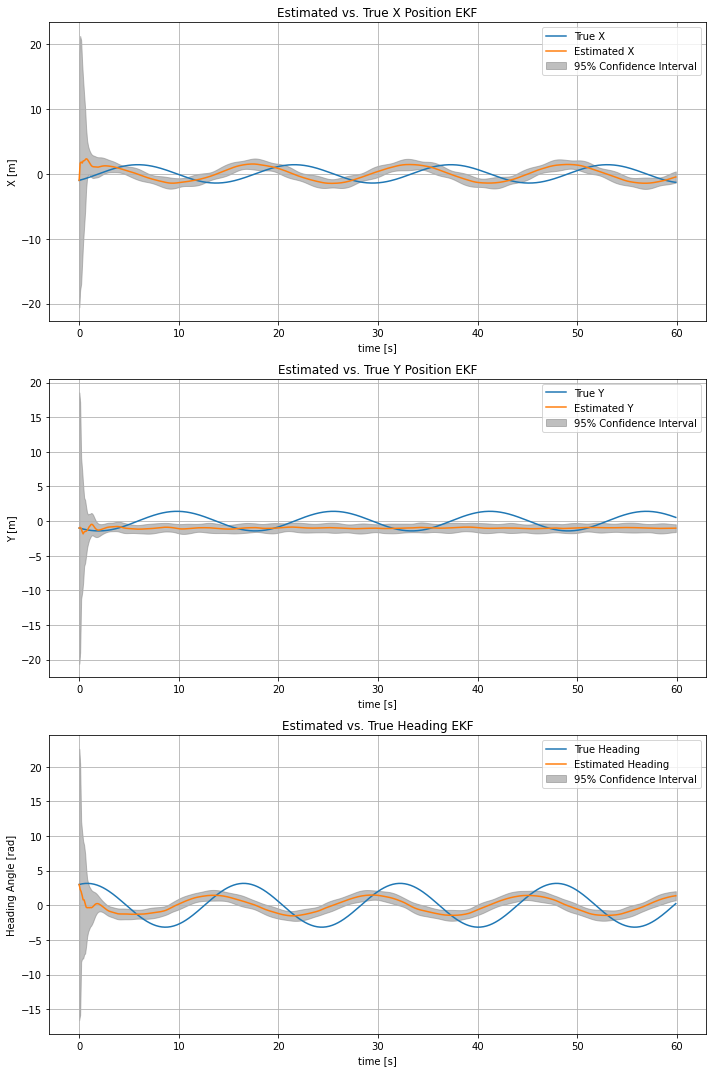

In [23]:
time_step = del_t
time_array = np.arange(0, len(x_est_hist) * time_step, time_step)

std_dev_heading = np.sqrt(P_est_hist[:, 2, 2])
confidence_interval_heading = 1.96 * std_dev_heading #95%

std_dev_x = np.sqrt(P_est_hist[:, 0, 0])
confidence_interval_x = 1.96 * std_dev_x

std_dev_y = np.sqrt(P_est_hist[:, 1, 1])
confidence_interval_y = 1.96 * std_dev_y

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(time_array, posehist[:, 0], label="True X")
axs[0].plot(time_array, x_est_hist[:, 9], label="Estimated X")
axs[0].fill_between(time_array, x_est_hist[:,9] - confidence_interval_x, x_est_hist[:, 9] + confidence_interval_x, color='gray', alpha=0.5, label="95% Confidence Interval")
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('X [m]')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Estimated vs. True X Position EKF')

# Plot Y Position
axs[1].plot(time_array, posehist[:, 1], label="True Y")
axs[1].plot(time_array, x_est_hist[:, 10], label="Estimated Y")
axs[1].fill_between(time_array,  x_est_hist[:, 10] - confidence_interval_y, x_est_hist[:, 10] + confidence_interval_y, color='gray', alpha=0.5, label="95% Confidence Interval")
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('Y [m]')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Estimated vs. True Y Position EKF')

axs[2].plot(time_array, posehist[:, 2], label="True Heading")
axs[2].plot(time_array, x_est_hist[:, 11], label="Estimated Heading")
axs[2].fill_between(time_array, x_est_hist[:, 11] - confidence_interval_heading, x_est_hist[:, 11] + confidence_interval_heading, color='gray', alpha=0.5, label="95% Confidence Interval")
axs[2].set_xlabel('time [s]')
axs[2].set_ylabel('Heading Angle [rad]')
axs[2].legend()
axs[2].grid(True)
axs[2].set_title('Estimated vs. True Heading EKF')

plt.tight_layout()
plt.show()


